In [1]:
import numpy as np
from scipy import constants
import pandas as pd
import matplotlib.pyplot as plt
from tweezer_functions import * 

#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

# Presentations - 11/16/23

In [ ]:
transitions = np.array([(393.3663*1e-9,147000000.0), (396.8469*1e-9,140000000.0)])
tweezerLams = np.linspace(350*1e-9,700*1e-9,1000)

NA = 0.5
#beamwaists = [(2*lam)/(pi * NA) for lam in tweezerLams]
beamwaists = [(0.41*lam)/(NA) for lam in tweezerLams]
power = 1e-3

sca = []
trapF = []

for i in range(len(tweezerLams)):
    sc = 0.
    po = 0.
    omegaTweezer = 2.*pi*c/tweezerLams[i]
    w0 = beamwaists[i]
    for t in transitions:
        omegaRes = 2.*pi*c/t[0]
        sc = sc + scatteringRWA(omegaTweezer,t[1],omegaRes,power,w0)
        po = po + potentialRWA(omegaTweezer,t[1],omegaRes,power,w0)
                                
    sca.append(sc)
    trapF.append(omega_radial(abs(po)/(2*pi),w0,m))
    
    

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,4),dpi = 300)


ax.plot(tweezerLams*1e9, sca, 'r')
ax.vlines(532,0,1000,'g')

ax2 = ax.twinx()
ax2.plot(tweezerLams*1e9, np.array(trapF)*1e-6, 'b')
ax2.vlines(532,0,1000,'g')


ax2.set_ylim(0,5)
ax.set_ylim(0,1000)
ax.set_xlim(350,700)
ax.set_ylabel('Scattering [Hz]')
ax.set_xlabel('Tweezer Wavelength [nm]')
ax2.set_ylabel('Optical Trap Frequency (MHz)')
ax.grid(True)
plt.show()

In [ ]:
beamwaists

# LPS Presentation 07/30/24

In [2]:
df = pd.read_csv('S_P_only.csv',sep = ",",encoding='UTF-8')

lambdares = np.array(df["wavelength (nm)"])*1e-9
omegares = 2*pi*c/lambdares
linewidths = np.array(df["A_ki (s^-1)"])

In [3]:
lams = np.linspace(300,800,500)*1e-9
omegas_twzs = 2*pi*c/lams
Popt = 50e-3
w0s = 5e-6

w_twz_r,w_twz_a = tweezer_optical_potential_to_trap_frequency(omegas_twzs,linewidths,omegares,Popt,w0s,m)
s = scattering(omegas_twzs,linewidths,omegares,Popt,w0s)

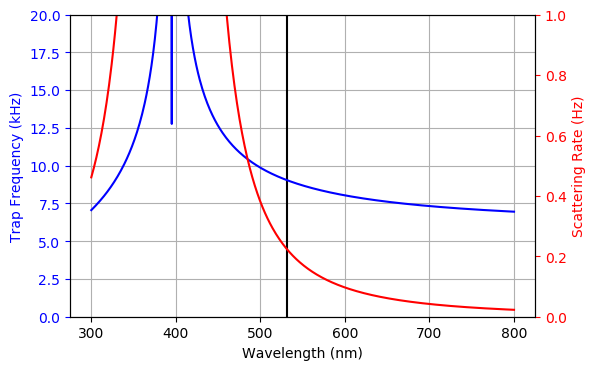

In [26]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(lams*1e9,w_twz_r*1e-3/(2*np.pi),'b')
ax.vlines(532,0,20,'k')

ax2=ax.twinx()
ax2.plot(lams*1e9,s,'r')

ax.set_ylim(0,20)
ax2.set_ylim(0,1)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Trap Frequency (kHz)',color='b')
ax2.set_ylabel('Scattering Rate (Hz)',color='r')

ax.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='r')

ax.grid()
plt.show()